In [1]:
import timeit

import numpy as np

import pylab

import matplotlib.pyplot as plt

import matplotlib.cm as cm

import matplotlib as mtp

def distance(a,b):
	return np.sqrt((a[0]-b[0])**2 +(a[1]-b[1])**2)

def sor(a):
	return a[2]

In [2]:
def myKmeans1(y,nclust,centers,centerslast):
	global m
	m+=1
	centerslast =np.copy(centers)
	for i in y :
		i[2] = 1
		mindist = distance(i[0:2],centers[0,:])
		for j in enumerate(centers):
			(i[2], mindist) = (j[0]+1, distance(i[0:2],j[1])) if (distance(i[0:2],j[1]) < mindist) else (i[2], mindist)
	for j in enumerate(centers):
		j[1][0]=np.sum(y[y[:,2]==j[0]+1,0])
		j[1][1]=np.sum(y[y[:,2]==j[0]+1,1])
		C = np.sum(y[y[:,2]==(j[0]+1),2]) // (j[0]+1)
		j[1][0] = 0 if C==0 else j[1][0] / C
		j[1][1] = 0 if C==0 else j[1][1] / C
	q = centerslast == centers
	return None if q.all() else myKmeans1(y,nclust,centers,centerslast)

In [3]:
def myKmeans(y,nclust):
	centers1 = np.copy(y[0:nclust])
	for i in range(1,nclust):
		maxdist=0
		for j in range(len(y)):
			if maxdist < sum(np.sqrt((centers1[0:i][:,0]-y[j][0])**2+(centers1[0:i][:,1]-y[j][1])**2)):
				maxdist = sum(np.sqrt((centers1[0:i][:,0]-y[j][0])**2+(centers1[0:i][:,1]-y[j][1])**2))
				centers1[i] = y[j]
	centerslast1 = np.zeros(3*nclust)
	myKmeans1(y,nclust,centers1,centerslast1)

In [4]:
#разбиваем точки на кластеры сортируем, повторяем для каждой отсортированной половины
def myKmeanssort(y,nclust):
	myKmeans(y,nclust)
	x = y[y[:,2].argsort()]
	if len(x) > nclust-1:
		for i in range(nclust):
			x[x[:,2] == i+1] = np.copy(myKmeanssort(x[x[:,2] == i+1],nclust))
	return x

In [5]:
nclust = 20
m = 0
nclust1 = 2
N = 1000
np.random.seed(3)
y = np.random.rand((3)*N)
y = y.reshape(-1,3)
centers = np.zeros(4*nclust)
centers = centers.reshape(-1,4)
centers[:,0:3] = np.copy(y[0:nclust])

for i in range(1,nclust):
		maxdist=0
		for j in range(len(y)):
			if maxdist < sum(np.sqrt((centers[0:i][:,0]-y[j][0])**2+(centers[0:i][:,1]-y[j][1])**2)):
				maxdist = sum(np.sqrt((centers[0:i][:,0]-y[j][0])**2+(centers[0:i][:,1]-y[j][1])**2))
				centers[i,0:3] = y[j]

centerslast = np.copy(centers)

In [6]:
%timeit myKmeans1(y,nclust,centers,centerslast)

The slowest run took 86.41 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 73.9 ms per loop


In [7]:
print(m)

93


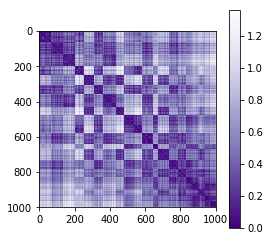

100 loops, best of 3: 6.7 ms per loop


In [8]:
y = y[y[:,2].argsort()]
D = (y[:,0][:, np.newaxis] - y[:,0]) ** 2
D += (y[:,1][:, np.newaxis] - y[:,1]) ** 2
D = np.sqrt(D)
plt.figure(figsize=(4, 4))
plt.imshow(D, cmap='Purples_r')
plt.colorbar(orientation='vertical', pad=0.06);
plt.show()
for i in enumerate(centers):
	centers[i[0],3]=i[0]

%timeit myKmeanssort(centers,nclust1)
centers = myKmeanssort(centers,nclust1)

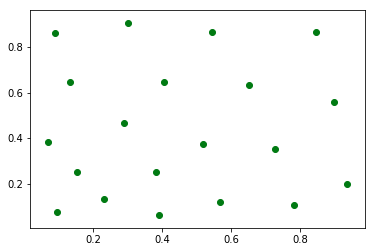

In [9]:
for i in range(nclust1) :
	plt.scatter(centers[centers[:,2] == i+1, 0],centers[centers[:,2] == i+1, 1],c = '#'+(hex((1000000 * (i+1)) // nclust1))[2:-1].rjust(6,'0'))
plt.show()

In [10]:
for i in y:
	for j in enumerate(centers):
		if j[1][3]+1 == i[2]:
			i[2] = j[0]+1
			break

In [11]:
y = y[y[:,2].argsort()]

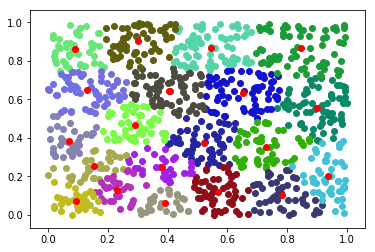

In [12]:
for i in range(nclust) :
	plt.scatter(y[y[:,2] == i+1, 0],y[y[:,2] == i+1, 1],c = '#'+(hex(200000000 * (i+1) // nclust))[2:-1].rjust(6,'0'))
	plt.scatter(centers[i,0],centers[i,1],c='r')
plt.show()

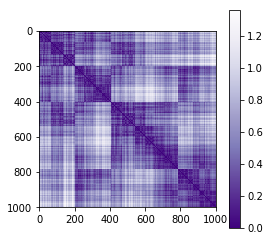

In [13]:
D = (y[:,0][:, np.newaxis] - y[:,0]) ** 2
D += (y[:,1][:, np.newaxis] - y[:,1]) ** 2
D = np.sqrt(D)
plt.figure(figsize=(4, 4))
plt.imshow(D, cmap='Purples_r')
plt.colorbar(orientation='vertical', pad=0.06);
plt.show()

In [3]:
nclust = 20
nclust1 = 2
m = 0
N = 1000
np.random.seed(3)
y = np.random.rand((3)*N)
y = y.reshape(-1,3)
centers = np.zeros(4*nclust)
centers = centers.reshape(-1,4)
centers[:,0:3] = np.copy(y[0:nclust])

centerslast = np.copy(centers)

In [4]:
%timeit myKmeans1(y,nclust,centers,centerslast)

The slowest run took 25.54 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 79.1 ms per loop


In [5]:
print(m)
#почему-то если не инициализировать начальные значения центров кластеров, получается лучше всего

31


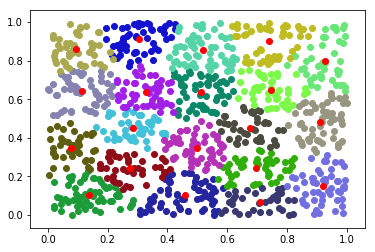

In [6]:
for i in range(nclust) :
	plt.scatter(y[y[:,2] == i+1, 0],y[y[:,2] == i+1, 1],c = '#'+(hex(200000000 * (i+1) // nclust))[2:-1].rjust(6,'0'))
	plt.scatter(centers[i,0],centers[i,1],c='r')
plt.show()

In [3]:
nclust = 20
m = 0
nclust1 = 2
N = 1000
np.random.seed(3)
y = np.random.rand((3)*N)
y = y.reshape(-1,3)
centers = np.zeros(4*nclust)
centers = centers.reshape(-1,4)
centers[:,0:3] = np.copy(y[0:nclust])

for i in range(1,nclust):
		maxdist=0
		for j in range(len(y)):
			if maxdist < sum((centers[0:i][:,0]-y[j][0])**2+(centers[0:i][:,1]-y[j][1])**2):
				maxdist = sum((centers[0:i][:,0]-y[j][0])**2+(centers[0:i][:,1]-y[j][1])**2)
				centers[i,0:3] = y[j]

centerslast = np.copy(centers)

In [4]:
%timeit myKmeans1(y,nclust,centers,centerslast)

The slowest run took 117.81 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 83.8 ms per loop


In [5]:
print(m)


137


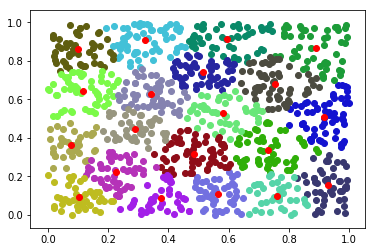

In [6]:
for i in range(nclust) :
	plt.scatter(y[y[:,2] == i+1, 0],y[y[:,2] == i+1, 1],c = '#'+(hex(200000000 * (i+1) // nclust))[2:-1].rjust(6,'0'))
	plt.scatter(centers[i,0],centers[i,1],c='r')
plt.show()